In [103]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [105]:
import plotly
import cufflinks as cf
cf.go_offline()

import plotly.io as pio
pio.renderers.default = "colab"


In [106]:
import os
filepath = os.path.join('/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/', 'Advertising.csv')


In [107]:
df = pd.read_csv(filepath)
# df = pd.read_csv('Advertising.csv')


In [197]:
df.head()


,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In SIMPLE-LINEAR-REGRESSION we deals with only one single feature X. But we have 3. So we add them up and made it as a single feature.


In [198]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']


In [199]:
df.head()


,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


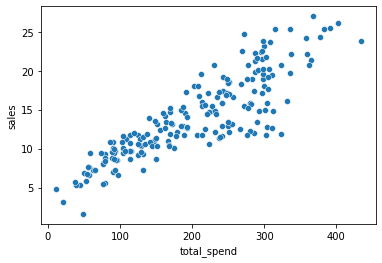

In [200]:
sns.scatterplot(x='total_spend', y='sales', data=df)


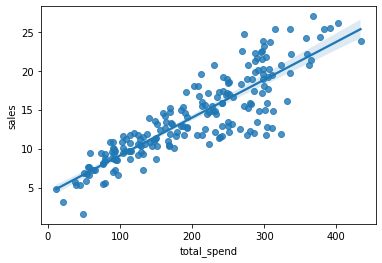

In [201]:
sns.regplot(x='total_spend', y='sales', data=df)


In [202]:
X = df['total_spend']
y = df['sales']


## help(np.polyfit)

In [203]:
help(np.polyfit)


Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [204]:
np.polyfit(X, y, deg=1)


array([0.04868788, 4.24302822])

## Checking Manually

In [35]:
# y = B1x + B0 Linear line
# B1 = 0.04868788
# B0 = 4.24302822


In [124]:
potential_spend = np.linspace(0, 500, 100)


In [118]:
preicted_sales = 0.04868788 * potential_spend + 4.24302822


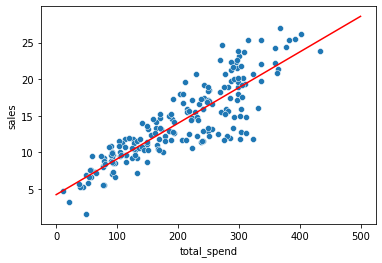

In [125]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend, preicted_sales, color='red')


## Double-click (or enter) to edit

In [126]:
spend = 250

sales = 0.04868788 * spend + 4.24302822
sales

16.41499822

In [205]:
np.polyfit(X, y, 3)
# for 3 degree polinomials
# y = B3x^3 + B2x^2 + B1x + B0


array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [206]:
pot_spend = np.linspace(0, 500, 100)
pred_sales = 3.07615033e-07 * pot_spend**3 + (-1.89392449e-04)*pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00


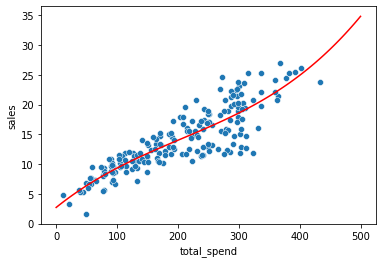

In [207]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(pot_spend, pred_sales, color='red')


## Introducing SciKit Learn

We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

---


In [208]:
X = df[['TV','radio','newspaper']]
y = df['sales']

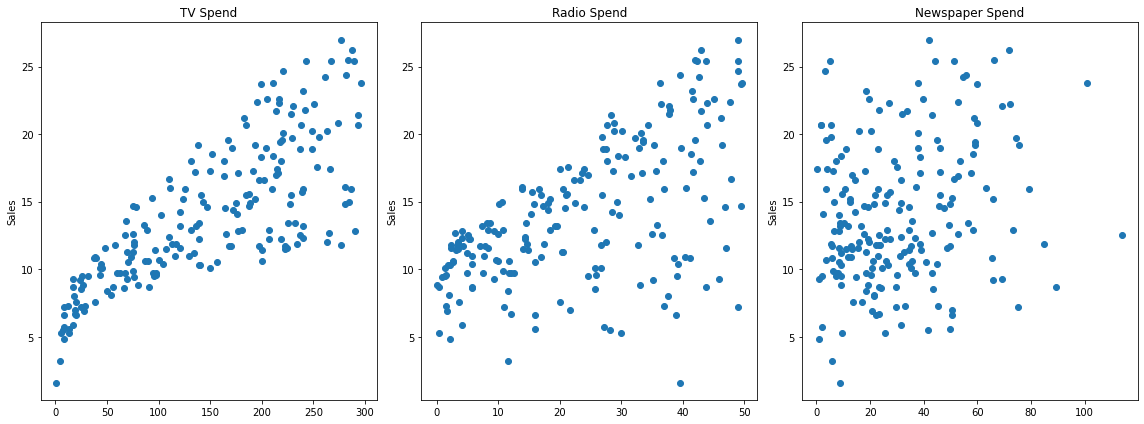

In [209]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout()


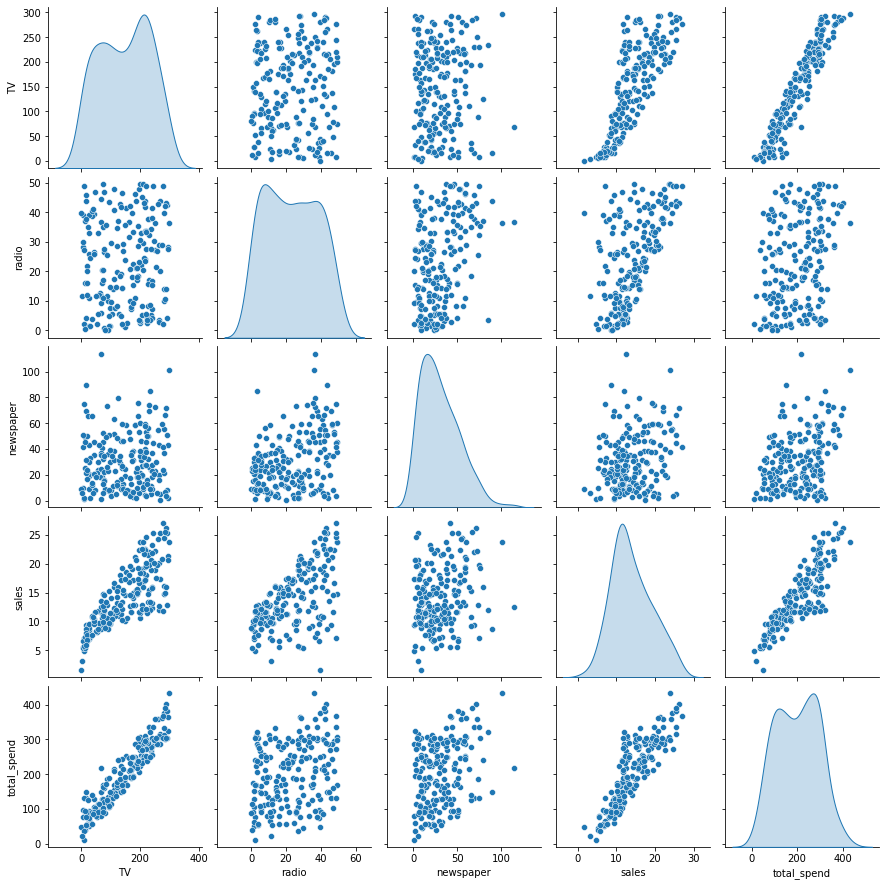

In [210]:
# Relationships between features
sns.pairplot(df, diag_kind='kde')


In [212]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [213]:
from sklearn.model_selection import train_test_split


## help(trian_test_split)

In [214]:
help(train_test_split)


Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [216]:
len(X_train)


140

In [217]:
len(X_test)


60

In [219]:
from sklearn.linear_model import LinearRegression


## Help(LignearRegression)

In [220]:
help(LinearRegression)


Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

## Model Creation

In [221]:
my_model = LinearRegression()


In [222]:
my_model.fit(X_train, y_train)


LinearRegression()

In [223]:
X_test.head()


,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [224]:
y_test.head()


37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [225]:
test_predict = my_model.predict(X_test)


In [226]:
my_model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [228]:
df['sales'].mean()


14.022500000000003

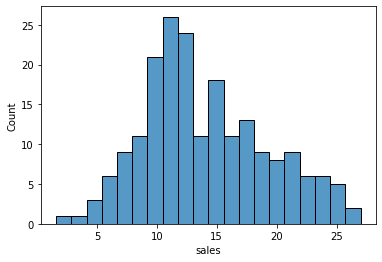

In [229]:
sns.histplot(data=df, x='sales', bins=20)


In [230]:
mean_absolute_error(y_test, test_predict)


1.213745773614481

In [231]:
msr = mean_squared_error(y_test, test_predict)
msr

2.298716697886379

In [232]:
np.sqrt(msr)


1.5161519375993882

In [233]:
# plt.iplot(kind='hist', x='sales',data = df, bins=30)
df['sales'].iplot(kind='hist', bins=30, color='blue')


## Residual Plot


In [244]:
test_residuals = y_test - test_predict


In [235]:
# test_residuals


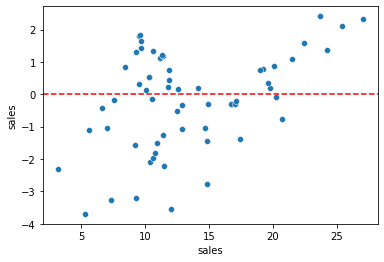

In [245]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



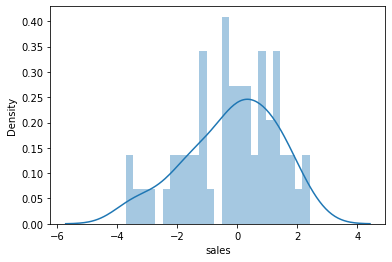

In [241]:
sns.distplot(test_residuals, bins=25, kde=True)


In [239]:
import scipy as sp


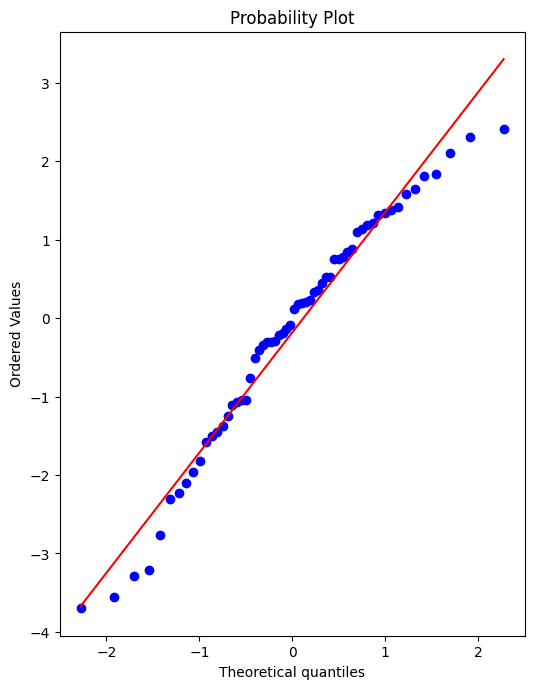

In [240]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
f = sp.stats.probplot(test_residuals, plot=ax)


## Deployment

In [265]:
final_model = LinearRegression()


In [266]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [267]:
final_model.fit(X, y)


LinearRegression()

In [268]:
final_model.coef_


array([ 0.04576465,  0.18853002, -0.00103749])

In [269]:
X.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [270]:
y_hat = final_model.predict(X)


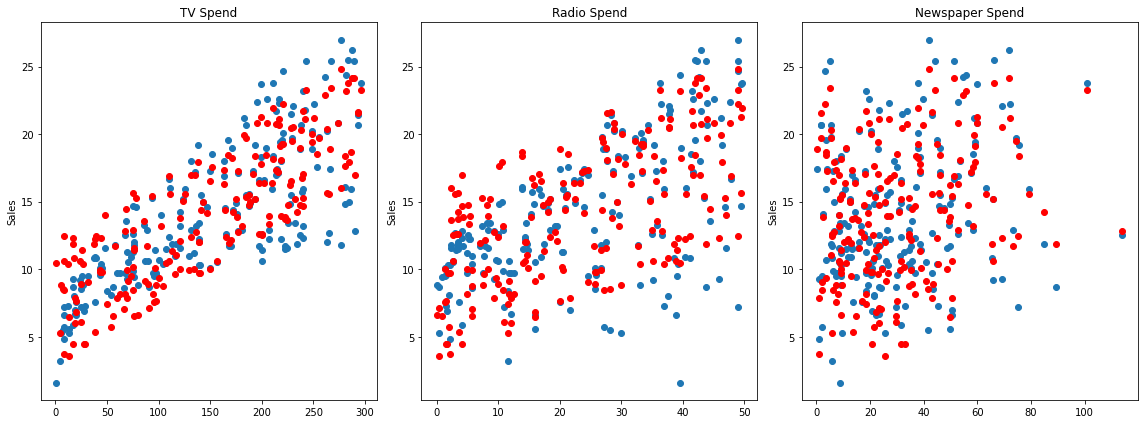

In [271]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout()


In [272]:
from joblib import dump,load

In [273]:
dump(final_model,"final_sales_model.joblib") # this file will be create under "/content/"

!mv "/content/final_sales_model.joblib" "/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/"
# !ls "/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/"

In [274]:
filepath = os.path.join('/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/',"final_sales_model.joblib")

In [275]:
loaded_model = load(filepath)

In [276]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [277]:
X.shape

(200, 3)

## Testing the loded model

In [279]:
campine = [[149,22,12]]

In [280]:
loaded_model.predict(campine)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([13.893032])